In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import pandas as pd
from google.colab import files
import io

print("Por favor, selecione o arquivo 'atividade3_dataset.csv' para upload.")

uploaded = files.upload()

file_name = next(iter(uploaded))

try:
    df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')), sep=';')
    print("\nDataset carregado com sucesso!")
    print(df.head())
except Exception as e:
    print(f"\nErro ao carregar o dataset: {e}")

Por favor, selecione o arquivo 'atividade3_dataset.csv' para upload.


Saving atividade3_dataset.csv to atividade3_dataset.csv

Dataset carregado com sucesso!
   ID     Nome  Idade          Cidade   Produto    Preço  Quantidade  \
0   1  Mariana   48.0       FORTALEZA    Tablet  2010,87           7   
1   2    Bruno   42.0  RIO DE JANEIRO   Teclado      NaN           6   
2   3      Ana   54.0  RIO DE JANEIRO   Monitor  3619.29           2   
3   4   Carlos   62.0        CURITIBA   Teclado  40415.9           8   
4   5  Mariana   60.0        CURITIBA  Notebook   716.66           8   

  Data_Compra  
0  30-05-2024  
1  12-04-2025  
2  10-12-2022  
3  31-12-2022  
4  14-09-2023  


In [4]:
print(df.columns)

Index(['ID', 'Nome', 'Idade', 'Cidade', 'Produto', 'Preço', 'Quantidade',
       'Data_Compra'],
      dtype='object')


In [5]:
print(df.isnull().sum())

ID              0
Nome            0
Idade          21
Cidade          0
Produto         0
Preço          37
Quantidade      0
Data_Compra     0
dtype: int64


In [6]:
print(df.fillna(0, inplace=True))

None


In [7]:
print(df.duplicated().sum())

8


In [8]:
print(df.drop_duplicates())

      ID      Nome  Idade          Cidade     Produto    Preço  Quantidade  \
0      1   Mariana   48.0       FORTALEZA      Tablet  2010,87           7   
1      2     Bruno   42.0  RIO DE JANEIRO     Teclado        0           6   
2      3       Ana   54.0  RIO DE JANEIRO     Monitor  3619.29           2   
3      4    Carlos   62.0        CURITIBA     Teclado  40415.9           8   
4      5   Mariana   60.0        CURITIBA    Notebook   716.66           8   
..   ...       ...    ...             ...         ...      ...         ...   
497  498  Fernanda   41.0       SÃO PAULO     Teclado  1176.08           9   
498  499     Lucas   22.0    PORTO ALEGRE     Teclado  3209.09           5   
499  500     Pedro   46.0  RIO DE JANEIRO     Teclado  3474.99           9   
503  156      João   47.0  belo horizonte  Smartphone  3444,96           7   
508   69      João   25.0  BELO HORIZONTE     Headset  31440.9           8   

    Data_Compra  
0    30-05-2024  
1    12-04-2025  
2    10-1

In [9]:
df['Cidade'] = df['Cidade'].str.lower().str.strip()
df['Cidade'] = df['Cidade'].replace({'rio de janeiro': 'Rio de Janeiro', 'são paulo': 'São Paulo', 'curitiba': 'Curitiba', 'salvador': 'Salvador', 'fortaleza': 'Fortaleza', 'belo horizonte': 'Belo Horizonte', 'porto alegre': 'Porto Alegre', 'manaus': 'Manaus'})

In [10]:
df['Preço'] = df['Preço'].str.replace(',', '.', regex=False)

In [11]:
df['Idade'] = pd.to_numeric(df['Idade'], errors='coerce')
df['Preço'] = pd.to_numeric(df['Preço'], errors='coerce')
df['Data_Compra'] = pd.to_datetime(df['Data_Compra'], format='%d-%m-%Y', errors='coerce')

In [12]:
print(df.head())

   ID     Nome  Idade          Cidade   Produto     Preço  Quantidade  \
0   1  Mariana   48.0       Fortaleza    Tablet   2010.87           7   
1   2    Bruno   42.0  Rio de Janeiro   Teclado       NaN           6   
2   3      Ana   54.0  Rio de Janeiro   Monitor   3619.29           2   
3   4   Carlos   62.0        Curitiba   Teclado  40415.90           8   
4   5  Mariana   60.0        Curitiba  Notebook    716.66           8   

  Data_Compra  
0  2024-05-30  
1  2025-04-12  
2  2022-12-10  
3  2022-12-31  
4  2023-09-14  


In [13]:
mediana_idade = df['Idade'].median()
media_preco = df['Preço'].mean()

In [14]:
df['Idade'] = df['Idade'].fillna(mediana_idade)
df['Preço'] = df['Preço'].fillna(media_preco)
df['Produto'] = df['Produto'].fillna('Desconhecido')

In [15]:
print(df.isnull().sum())

ID             0
Nome           0
Idade          0
Cidade         0
Produto        0
Preço          0
Quantidade     0
Data_Compra    0
dtype: int64


In [18]:
duplicatas_count = df.duplicated().sum()
print(f"Número de duplicatas encontradas: {duplicatas_count}")

Número de duplicatas encontradas: 9


In [20]:
df.drop_duplicates(inplace=True)

In [23]:
print(df[['Idade', 'Preço', 'Quantidade']].describe())

            Idade         Preço  Quantidade
count  501.000000    501.000000  501.000000
mean    42.544910   3119.605232    5.752495
std     17.369412   3656.345808    2.863323
min      0.000000    509.890000    1.000000
25%     29.000000   1772.050000    3.000000
50%     43.000000   2991.120000    6.000000
75%     57.000000   3710.160000    8.000000
max     70.000000  47611.600000   10.000000


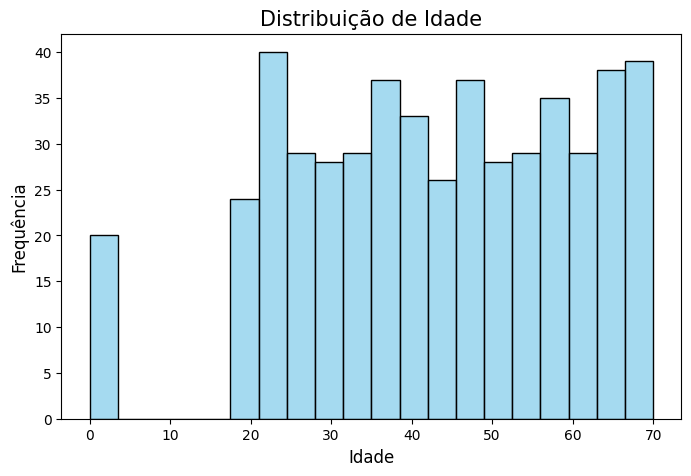

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Idade'], bins=20, color='skyblue')
plt.title('Distribuição de Idade', fontsize=15)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

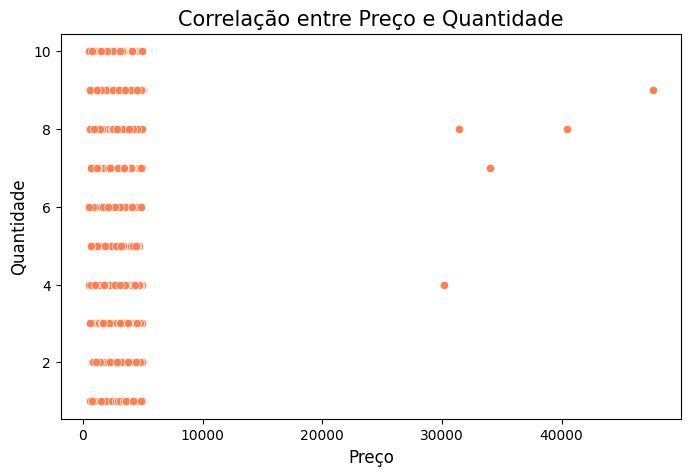

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Preço', y='Quantidade', data=df, color='coral')
plt.title('Correlação entre Preço e Quantidade', fontsize=15)
plt.xlabel('Preço', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.show()

Depois de carregar o arquivo, a primeira coisa que fiz foi a limpeza e padronização dos dados. Ttinha alguns problemas, como por exemplo, o nome de algumas cidades estava escrito de jeitos diferentes, também vi que as colunas de idade e preço estavam como texto, por causa das vírgulas e dos valores vazios, então converti tudo para número para poder fazer os cálculos. A data de compra também foi para o formato certo.

Depois, fui para o tratamento dos valores que estavam faltando. Na coluna de idade, usei a mediana para preencher os espaços, pois achei mais seguro para não bagunçar a média com valores estranhos. Já na coluna de preço, preenchi com a média, que deu um bom valor para o tipo de dado. E na de produto coloquei "Desconhecido" seguindo a sugestão da atividade.

Depois disso, verifiquei se tinha alguma linha duplicada e, para garantir a precisão da análise, simplesmente as removi.

Por fim, fiz uma exploração inicial. Criei dois gráficos. Um deles mostra a distribuição das idades, e o outro me deu uma ideia da relação entre o preço e a quantidade vendida. Com tudo isso, o dataset ficou limpo e pronto para a análise.

In [26]:
df.to_csv("Base_limpa2.csv", index=False)
